## Help functions

In [1]:
def is_positive_int(value): 
    return (isinstance(value, int) and value > 0)

##### Wigner value

In [2]:
import numpy as np
import math

In [3]:
def wigner_density(x):
    '''
        Function takes an x and return Wigner semicircular distribution
        
        input:
            x: x for the formula
        output:
            f(x) for Wigner formula
    '''
    
    if x < -2 or x > 2:
        return 0
    
    f_x = np.sqrt(4 - x**2)/(2*math.pi)
    return f_x

In [4]:
x_np = np.float_(0.5)
x_p = 0.5

print(wigner_density(x_np))
print(wigner_density(x_p))

0.30820222203074993
0.30820222203074993


##### Wigner matrix

In [5]:
import random
import scipy
import scipy.spatial

def generate_wigner(n):
    '''
        Function generates nxn Wigner matrix (Wigner matrix does not contain Wigner values)
        
        input:
            n: n-dimention
        output:
            nxn Wigner matrix
    '''
    
    if not is_positive_int(n):
        raise ValueError('Input should be a positive integer')
    
    # count how many upper triangle values should be (number of x-s)
    # x x x
    # 0 x x
    # 0 0 x
    elem = sum([ i for i in range(0, n+1) ])
    # generate random values with mean 0 and standard deviation = sqrt(variance), where variance = 1/n
    random_wigner_numbers = np.random.normal(0, np.sqrt(1/n), elem)
    
    # generate matrix
    matrix = np.zeros((n, n))
    # assign generated values to upper corner matrix
    matrix[np.triu_indices(n, 0)] = random_wigner_numbers
    
    return np.triu(matrix) + np.tril(matrix.T, -1)

In [6]:
generate_wigner(5)

array([[ 0.10704986,  0.16289197, -0.25753787, -0.20112242, -0.12170109],
       [ 0.16289197, -0.23907386, -0.18679928,  0.60891911,  0.00079209],
       [-0.25753787, -0.18679928,  0.10143624,  0.02750436,  0.14736524],
       [-0.20112242,  0.60891911,  0.02750436, -0.10864275,  0.05211982],
       [-0.12170109,  0.00079209,  0.14736524,  0.05211982, -0.36227384]])

##### Eigenvalues of Wigner matrix

In [7]:
def get_spectrum(matrix):
    '''
        Function takes a matrix and generates eigenvalues in non-decreasing order
        
        input:
            matrix: matrix of Wigner values
        output:
            eigenvalues
    '''
    return np.linalg.eigh(matrix)[0]

In [8]:
get_spectrum(generate_wigner(5))

array([-1.66705677, -0.79023042, -0.24718539,  0.55628331,  0.90396266])

### Generate matrixes matrixes

In [14]:
import matplotlib.pyplot as plt

# generated matrixes for n = 100, 200, 500 and 1000
n_100 = get_spectrum(generate_wigner(100))
n_200 = get_spectrum(generate_wigner(200))
n_500 = get_spectrum(generate_wigner(500))
n_1000 = get_spectrum(generate_wigner(1000))

##### Plot

In [17]:
# create a help function which will generate density of the semicircular law
sem_law = np.vectorize(wigner_density)
bins = 50

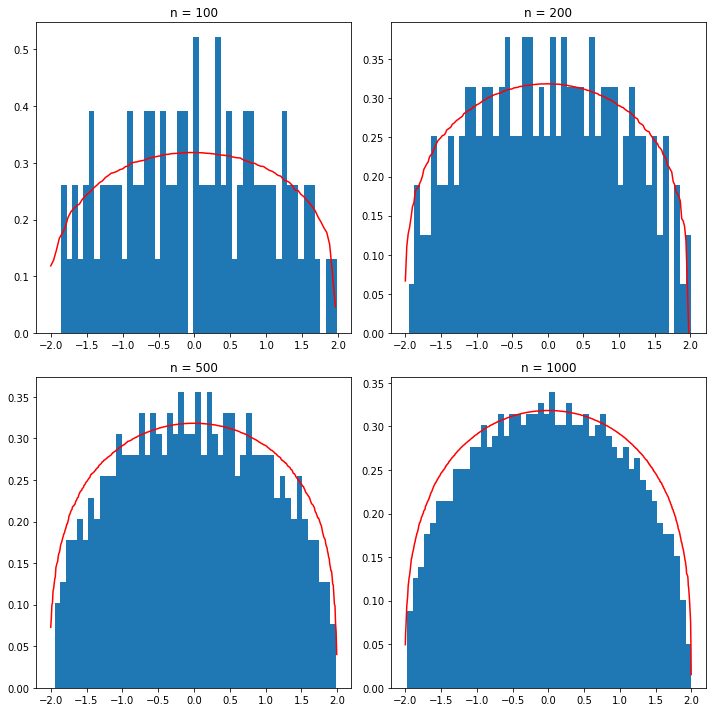

In [18]:
# change height of subplots
plt.subplots(2,2,figsize=(10,10))

plt.subplot(221)
plt.hist(n_100, bins, density=True)
plt.plot(np.arange(-2, 2, 4/100), sem_law(n_100.flatten()), 'r-')
plt.title('n = 100')

plt.subplot(222)
plt.hist(n_200, bins, density=True)
plt.plot(np.arange(-2, 2, 4/200), sem_law(n_200.flatten()), 'r-')
plt.title('n = 200')

plt.subplot(223)
plt.hist(n_500, bins, density=True)
plt.plot(np.arange(-2, 2, 4/500), sem_law(n_500.flatten()), 'r-')
plt.title('n = 500')

plt.subplot(224)
plt.hist(n_1000, bins, density=True)
plt.plot(np.arange(-2, 2, 4/1000), sem_law(n_1000.flatten()), 'r-')
plt.title('n = 1000')

_ = plt.tight_layout()